### Import modules

In [1]:
# Standard imports
import pandas as pd
import sys 
import os
import seaborn as sns
import os
import shutil

# Local imports
import analysis_functions

# Apply better style
analysis_functions.apply_heatmap_style()


### Plot tune scan

In [2]:
# Define study
STUDY_NAME = "tunescan_round_150_1500_neg_oct_higher_lumi"
COLLIDER = "base_collider"
PARQUET_PATH = f"../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0016/config_final.yaml"

# Load dataframe
df = pd.read_parquet(f"../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)

# Keep only relevant collider
df = df.reset_index(level=1)
df = df[df["name base collider"] == COLLIDER]

df


name base collider  \
beam  i_oct_b1 i_oct_b2 dqx  dqy  qx     qy     num_particles_per_bunch n_emitt_x n_emitt_y crossing_angle                      
lhcb1 -60.0    -60.0    15.0 15.0 62.305 60.309 1.400000e+11            2.5       2.5       250.0               base_collider   
                                         60.310 1.400000e+11            2.5       2.5       250.0               base_collider   
                                         60.311 1.400000e+11            2.5       2.5       250.0               base_collider   
                                         60.312 1.400000e+11            2.5       2.5       250.0               base_collider   
                                         60.313 1.400000e+11            2.5       2.5       250.0               base_collider   
...                                                                                                                       ...   
                                  62.323 60.328 1.400000e+11            2.5       2.5       250.0               base_collider   
                                         60.329 1.400000e+11            2.5       2.5       250.0               base_collider   
                                  62.324 60.328 1.400000e+11            2.5       2.5       250.0               base_collider   
                                         60.329 1.400000e+11            2.5       2.5       250.0               base_collider   
                                  62.325 60.329 1.400000e+11            2.5       2.5       250.0               base_collider   

                                                                                                            normalized amplitude in xy-plane  \
beam  i_oct_b1 i_oct_b2 dqx  dqy  qx     qy     num_particles_per_bunch n_emitt_x n_emitt_y crossing_angle                                     
lhcb1 -60.0    -60.0    15.0 15.0 62.305 60.309 1.400000e+11            2.5       2.5       250.0                                      3.655   
                                         60.310 1.400000e+11            2.5       2.5       250.0                                      3.931   
                                         60.311 1.400000e+11            2.5       2.5       250.0                                      3.793   
                                         60.312 1.400000e+11            2.5       2.5       250.0                                      3.793   
                                         60.313 1.400000e+11            2.5       2.5       250.0                                      3.793   
...                                                                                                                                      ...   
                                  62.323 60.328 1.400000e+11            2.5       2.5       250.0                                      2.000   
                                         60.329 1.400000e+11            2.5       2.5       250.0                                      2.000   
                                  62.324 60.328 1.400000e+11            2.5       2.5       250.0                                      2.000   
                                         60.329 1.400000e+11            2.5       2.5       250.0                                      2.000   
                                  62.325 60.329 1.400000e+11            2.5       2.5       250.0                                      2.000   

                                                                                                                qx  \
beam  i_oct_b1 i_oct_b2 dqx  dqy  qx     qy     num_particles_per_bunch n_emitt_x n_emitt_y crossing_angle           
lhcb1 -60.0    -60.0    15.0 15.0 62.305 60.309 1.400000e+11            2.5       2.5       250.0           62.305   
                                         60.310 1.400000e+11            2.5       2.5       250.0           62.305   
                                         60.311 1.400000e+11            2.5       2.

In [3]:
# Reshape for plotting
df_to_plot = df.pivot(index="qy", columns="qx", values="normalized amplitude in xy-plane")
df_to_plot

qx,62.305,62.306,62.307,62.308,62.309,62.310,62.311,62.312,62.313,62.314,...,62.316,62.317,62.318,62.319,62.320,62.321,62.322,62.323,62.324,62.325
qy,,,,,,,,,,,,,,,,,,,,,
60.309,3.655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.310,3.931,3.724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.311,3.793,3.793,3.862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.312,3.793,3.517,4.000,5.172,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.313,3.793,3.793,4.414,5.655,5.586,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.314,3.517,3.655,4.276,5.517,5.241,5.310,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.315,4.000,3.862,5.103,5.448,5.586,5.379,5.241,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.316,4.000,3.724,4.897,5.379,5.379,5.448,5.379,5.310,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.317,4.138,3.862,4.828,5.241,5.448,5.379,5.379,5.310,5.310,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Replace NaNs above the upper diagonal with 8
for qx in df_to_plot.columns:
    for qy in df_to_plot.index:
        if qy >= qx - 2 + 0.004:
            if pd.isna(df_to_plot.loc[qy, qx]):
                df_to_plot.loc[qy, qx] = 8

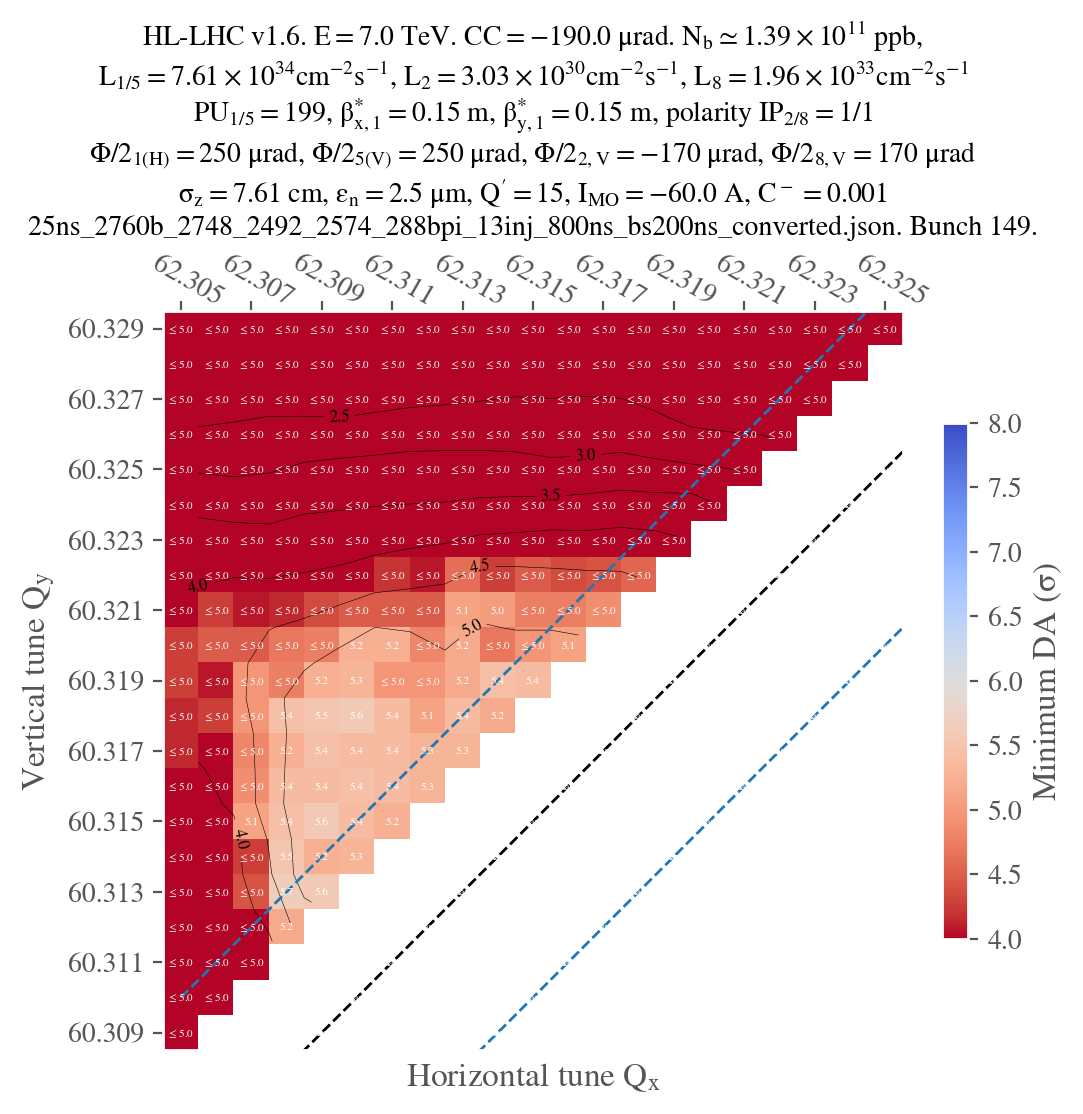

In [5]:
# Load configuration files
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]
analysis_functions.plot_heatmap(
    df_to_plot,
    f'{STUDY_NAME}_{COLLIDER}',
    link=None,
    plot_contours=True,
    conf_mad=conf_mad,
    conf_collider=conf_collider,
    betx=0.15,
    bety=0.15,
    Nb=True,
    green_contour=6.,
    extended_diagonal=False,
    vmin=4.,
    vmax=8.0,
    CC = True,
)
# ! Verified
